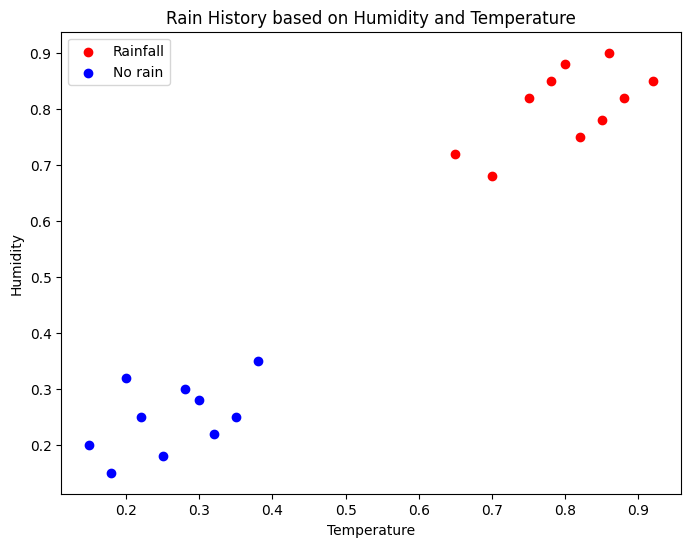

In [101]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

data = pandas.read_csv("Data/WeatherData_Q3.csv")

plt.figure(figsize=(8, 6))


frame = pandas.DataFrame(data)
rain = frame.loc[frame["rain"]==1]
nah = frame.loc[frame["rain"]==0]
plt.scatter(rain.temp, rain.humid,color='red',label='Rainfall')
plt.scatter(nah.temp, nah.humid,color='blue',label='No rain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Rain History based on Humidity and Temperature')
plt.legend()
plt.show()

In [102]:
SAMPLE = 15 #number of training points



#random weights/bias to start
w = np.random.rand(2)# between 0 and 1
reset_kinda_ish = int(np.random.rand()*300)
np.random.seed(421)
w[0]-=.5
w[1]-=.5 # makes it between -.5 and .5
print(w)
b = np.random.rand(1)
frame = frame.sample(frac=1)#shuffle shuffle baby
np.random.seed(reset_kinda_ish)
train = frame.sample(n=SAMPLE)#number of datasets to include for training, what isnt used will be used for testing
#not much of an impact because the data is either clustered as HIGH AND HIGH or LOW AND LOW. which makes it easy for the model to differentiate

test = frame.drop(train.index)
x = frame[['temp',"humid"]].values # array of temp and humid values.
y = frame[['rain']].values # output or predictor



def perceive(meow):
    return 1 if meow >= 0 else 0
times = 10 # number of times to run through the data
# the data is so clearly distinct I set it to only run once so there may be an occasional error otherwise its beautiful. Set to ten for like perfection
rate = .1
accuracy =[]
for itr in range(times):
    correct= 0
    for i in range(len(x)):# uses every data set

        woof = np.dot(w, x[i])+b
        #print(woof, perceive(woof))
        y_pred = perceive(woof)
        error = y[i] - y_pred

        w += rate*error*x[i]
        b+= rate*error

        if y_pred == y[i]:
            correct += 1
    accu = correct / len(x)
    accuracy.append(accu)
    print(f"Trial {itr+1}: Accuracy = {accu:.2%}")

[0.4616459  0.34271654]
Trial 1: Accuracy = 55.00%
Trial 2: Accuracy = 100.00%
Trial 3: Accuracy = 100.00%
Trial 4: Accuracy = 100.00%
Trial 5: Accuracy = 100.00%
Trial 6: Accuracy = 100.00%
Trial 7: Accuracy = 100.00%
Trial 8: Accuracy = 100.00%
Trial 9: Accuracy = 100.00%
Trial 10: Accuracy = 100.00%


The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:
    temp  humid  rain  predicted
5   0.32   0.22     0          0
9   0.38   0.35     0          0
16  0.80   0.88     1          1
11  0.70   0.68     1          1
4   0.30   0.28     0          0


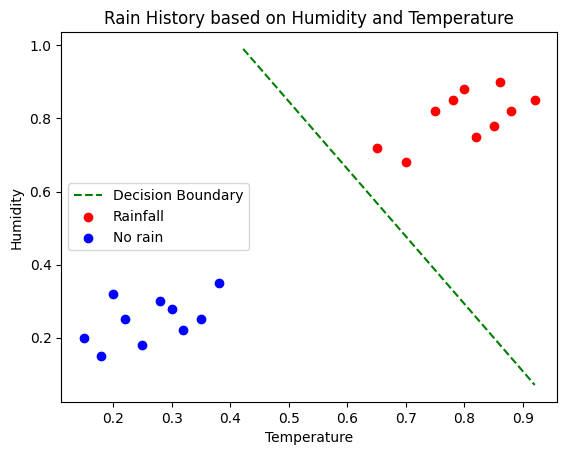

In [103]:

x_min, x_max = frame.temp.min(), frame.temp.max()
x_vals = np.linspace(x_min, x_max, 100)
y_vals = - (w[0] / w[1]) * x_vals - (b / w[1]) # i think theres an easier way but this gets the y value for the line to plot, it works tho

valid = (y_vals >= 0) & (y_vals <= 1)

x_vals = x_vals[valid] # otherwise the graph would sometimes go from -14 to 1 or something we only want to add to our original plot
y_vals = y_vals[valid]

plt.plot(x_vals, y_vals, color='green', linestyle='dashed', label='Decision Boundary')


test['predicted'] = test.apply(lambda dota: perceive(np.dot(w, [dota['temp'], dota['humid']]) + b), axis=1)# create a new column for the dataset that was not trained to see output
print("The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:")
print(test)
plt.scatter(rain.temp, rain.humid,color='red',label='Rainfall')
plt.scatter(nah.temp, nah.humid,color='blue',label='No rain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Rain History based on Humidity and Temperature')
plt.legend()
plt.show()



In [104]:
# Answers for questions
print('1.\t Yes the perceptron does separate the two classes (rain /no rain)\n')
print('2.\t Because the dataset is so distinct, i.e. rain and no rain are so clearly seperated the perceptron does not struggle to differentiate the two outputs\n')
print('3.\t The dataset provided is quite clear on the two classes, it doesnt get the whole picture, potentially having additional datapoints for example, days since last rainfall, air pressure, or something else and a more complex model (something other than a line to seperate them) should provide more accurate measurements even though the current dataset works great!\n')
print('4.\t Look at the green line on the graph above for the decision boundary\n')
print('5.\t With a 75% training vs 25% testing rate it gets really good results at about 3 training cycles when we only use 1 data point, it took about double that to get acceptable results. \n')
print('6.\t Different learning rates could have an impact by either not adjusting enough when the answer is wrong or adjusting too much i.e. changing a weight from .25 to .2500001 would barely have an impact but suddenly making it 5.3 would probably have too much of an impact both of which is not good, the first one can still be useful with large training trials but i cannot see the latter having good results\n')

1.	 Yes the perceptron does separate the two classes (rain /no rain)

2.	 Because the dataset is so distinct, i.e. rain and no rain are so clearly seperated the perceptron does not struggle to differentiate the two outputs

3.	 The dataset provided is quite clear on the two classes, it doesnt get the whole picture, potentially having additional datapoints for example, days since last rainfall, air pressure, or something else and a more complex model (something other than a line to seperate them) should provide more accurate measurements even though the current dataset works great!

4.	 Look at the green line on the graph above for the decision boundary

5.	 With a 75% training vs 25% testing rate it gets really good results at about 3 training cycles when we only use 1 data point, it took about double that to get acceptable results. 

6.	 Different learning rates could have an impact by either not adjusting enough when the answer is wrong or adjusting too much i.e. changing a weight fr